In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras import layers, models
import os

In [6]:
input_shape = (64, 64, 3)  
batch_size = 64
num_epochs = 50 

In [7]:
preprocessed_path = r"D:\FUCK!!\Pattern\Project\notebooks\preprocessed_RGB_images"

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

print("Setting up Training Generator...")
train_generator = train_datagen.flow_from_directory(
    os.path.join(preprocessed_path, 'train'),
    target_size=input_shape[:2], 
    batch_size=batch_size,
    class_mode='sparse',         
    color_mode='rgb',
    shuffle=True             
)
print(f"Found {train_generator.samples} images belonging to {train_generator.num_classes} classes in training set.")

print("\nSetting up Validation Generator...")
val_generator = train_datagen.flow_from_directory(
    os.path.join(preprocessed_path, 'val'),
    target_size=input_shape[:2], 
    batch_size=batch_size,
    class_mode='sparse',         
    color_mode='rgb',            
    shuffle=False                
)
print(f"Found {val_generator.samples} images belonging to {val_generator.num_classes} classes in validation set.")

print("\nSetting up Testing Generator...")
test_generator = train_datagen.flow_from_directory(
    os.path.join(preprocessed_path, 'test'),
    target_size=input_shape[:2], 
    batch_size=batch_size,
    class_mode='sparse',         
    color_mode='rgb',            
    shuffle=False                
)
print(f"Found {test_generator.samples} images belonging to {test_generator.num_classes} classes in validation set.")


Setting up Training Generator...
Found 30580 images belonging to 10 classes.
Found 30580 images belonging to 10 classes in training set.

Setting up Validation Generator...
Found 328 images belonging to 10 classes.
Found 328 images belonging to 10 classes in validation set.

Setting up Testing Generator...
Found 328 images belonging to 10 classes.
Found 328 images belonging to 10 classes in validation set.


In [22]:
model = models.Sequential([
    layers.Input(shape=input_shape),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2),

    # Conv Block 2
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2),

    # Conv Block 3
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2),

    # Conv Block 4
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2),

    # Conv Block 5
    layers.Conv2D(512, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2),

    # Classification head
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax', name='predictions') 
])


optimizer = Adam(learning_rate=0.0001) 

model.compile(optimizer=optimizer,
                    loss='sparse_categorical_crossentropy', 
                    metrics=['accuracy'])

print("\nModel Summary:")
model.summary()


Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │             

 Total params: 1,972,170 (7.52 MB)

 Trainable params: 1,968,650 (7.51 MB)

 Non-trainable params: 3,520 (13.75 KB)

In [11]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,          
    verbose=1,
    restore_best_weights=True 
)

model_checkpoint = ModelCheckpoint(
    filepath='best_CNN_model.keras', 
    monitor='val_loss',
    save_best_only=True, 
    verbose=1
)

In [12]:
print(f"\nStarting training for up to {num_epochs} epochs (head only)...")
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size, 
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size, 
    epochs=num_epochs,
    callbacks=[early_stopping, model_checkpoint] 
)
print("\nTraining finished.")


Starting training for up to 50 epochs (head only)...


c:\Users\omarn\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.2271 - loss: 2.7395
Epoch 1: val_loss improved from inf to 1.72178, saving model to best_CNN_model.keras
477/477 ━━━━━━━━━━━━━━━━━━━━ 119s 237ms/step - accuracy: 0.2272 - loss: 2.7389 - val_accuracy: 0.3625 - val_loss: 1.7218
Epoch 2/50
  1/477 ━━━━━━━━━━━━━━━━━━━━ 1:51 235ms/step - accuracy: 0.3281 - loss: 2.1945

c:\Users\omarn\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_loss improved from 1.72178 to 1.72134, saving model to best_CNN_model.keras
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3281 - loss: 2.1945 - val_accuracy: 0.3594 - val_loss: 1.7213
Epoch 3/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.3645 - loss: 1.9468
Epoch 3: val_loss improved from 1.72134 to 1.63704, saving model to best_CNN_model.keras
477/477 ━━━━━━━━━━━━━━━━━━━━ 109s 229ms/step - accuracy: 0.3645 - loss: 1.9467 - val_accuracy: 0.4250 - val_loss: 1.6370
Epoch 4/50
  1/477 ━━━━━━━━━━━━━━━━━━━━ 2:10 274ms/step - accuracy: 0.4219 - loss: 1.6540
Epoch 4: val_loss did not improve from 1.63704
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 781us/step - accuracy: 0.4219 - loss: 1.6540 - val_accuracy: 0.4375 - val_loss: 1.6383
Epoch 5/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.4322 - loss: 1.6670
Epoch 5: val_loss improved from 1.63704 to 1.51094, saving model to best_CNN_model.keras
477/477 ━━━━━━━━━━━━━━━━━━━━ 110s 231ms/step - accuracy: 0.432

In [13]:
model = load_model(r'D:\FUCK!!\Pattern\Project\Models\best_CNN_model.keras')

In [15]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_gen = test_datagen.flow_from_directory(
    directory=r'D:\FUCK!!\Pattern\Project\notebooks\preprocessed_RGB_images\test',    # point this to your test‐folder 
    target_size=input_shape[:2],           # e.g. (224, 224)
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False                           # important! so labels/preds align
)

Found 328 images belonging to 10 classes.


In [16]:
tf.keras.backend.clear_session()

model = load_model(r'D:\FUCK!!\Pattern\Project\Models\best_CNN_model.keras')

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    run_eagerly=True    
)

loss, acc = model.evaluate(test_gen, verbose=1)
print(f"\nTest loss: {loss:.4f} — Test accuracy: {acc:.4f}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 800ms/step - accuracy: 0.6105 - loss: 1.2345

Test loss: 1.4081 — Test accuracy: 0.5549


In [17]:
steps = int(np.ceil(test_gen.samples / batch_size))
pred_probs = model.predict(
    test_gen,
    steps = steps,
    verbose=1
)

pred_idxs = np.argmax(pred_probs, axis=1)
true_idxs = test_gen.classes
labels   = list(test_gen.class_indices.keys())


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step


In [18]:
print("\nClassification Report:\n")
print(classification_report(true_idxs, pred_idxs, target_names=labels))


Classification Report:

                                  precision    recall  f1-score   support

         Achaemenid architecture       0.67      0.69      0.68        48
American Foursquare architecture       0.66      0.78      0.71        45
        American craftsman style       0.42      0.32      0.36        25
   Ancient Egyptian architecture       0.52      0.52      0.52        23
           Art Deco architecture       0.59      0.43      0.50        30
        Art Nouveau architecture       0.42      0.92      0.57        25
            Baroque architecture       0.43      0.45      0.44        33
            Bauhaus architecture       0.87      0.61      0.71        33
         Beaux-Arts architecture       0.50      0.43      0.46        35
          Byzantine architecture       0.42      0.26      0.32        31

                        accuracy                           0.55       328
                       macro avg       0.55      0.54      0.53       328
           

In [19]:
print("\nConfusion Matrix:\n")
print(confusion_matrix(true_idxs, pred_idxs))


Confusion Matrix:

[[33  2  0  9  0  2  0  1  1  0]
 [ 1 35  4  0  0  1  0  1  2  1]
 [ 1 11  8  0  0  3  0  0  1  1]
 [ 8  0  0 12  0  1  1  0  0  1]
 [ 1  2  1  0 13  4  5  0  4  0]
 [ 0  0  0  1  0 23  1  0  0  0]
 [ 0  0  0  0  1  9 15  0  3  5]
 [ 1  3  1  0  3  1  1 20  1  2]
 [ 2  0  1  1  1  9  5  0 15  1]
 [ 2  0  4  0  4  2  7  1  3  8]]


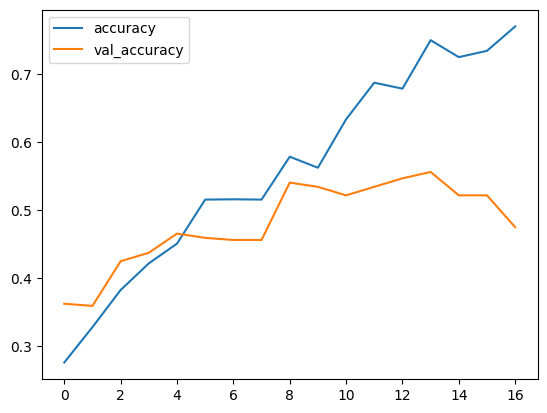

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend(); plt.show()

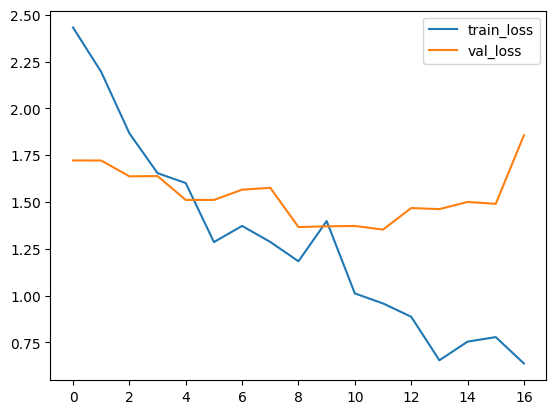

In [21]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(); plt.show()
